In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [2]:
# Load data
with open("../results/densenet201_results.json", "r") as f:
    dn201_res_os = json.load(f)
with open("../results/densenet201_results_cv.json", "r") as f:
    dn201_res_os_cv = json.load(f)
    dn201_res_os_cv["rank_n_accuracies_stacked"] = np.array(dn201_res_os_cv["rank_n_accuracies_stacked"])
with open("../results/densenet201_results_closed_set.json", "r") as f:
    dn201_res_cs = json.load(f)
with open("../results/resnet101_results.json", "r") as f:
    rn101_res_os = json.load(f)
with open("../results/resnet101_results_cv.json", "r") as f:
    rn101_res_os_cv = json.load(f)
    rn101_res_os_cv["rank_n_accuracies_stacked"] = np.array(rn101_res_os_cv["rank_n_accuracies_stacked"])
with open("../results/resnet101_results_closed_set.json", "r") as f:
    rn101_res_cs = json.load(f)

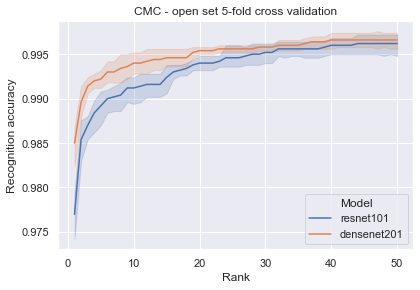

In [14]:
df_cv = pd.DataFrame()

df_cv["Accuracy"] = np.hstack([rn101_res_os_cv["rank_n_accuracies_stacked"].flatten(), dn201_res_os_cv["rank_n_accuracies_stacked"].flatten()])
# df_cv["style"] = np.repeat(0,len(dn201_res_os_cv["rank_n_accuracies_mean"]))
df_cv["Model"] = np.hstack([np.repeat("resnet101", rn101_res_os_cv["rank_n_accuracies_stacked"].shape[1] * 5), np.repeat("densenet201", dn201_res_os_cv["rank_n_accuracies_stacked"].shape[1]*5)])
df_cv["rank"] = np.hstack([range(1,51) for i in range(10)])

sns.lineplot(data=df_cv,x="rank", y="Accuracy", hue="Model")
plt.ylabel("Recognition accuracy")
plt.xlabel("Rank")
plt.tight_layout()
plt.title("CMC - open set 5-fold cross validation")

plt.savefig("cv_cmc.png")
plt.show()

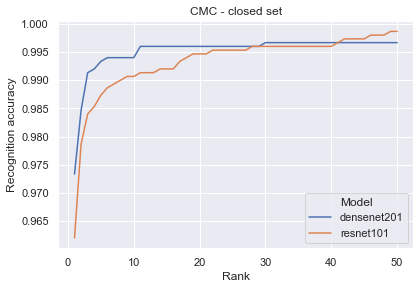

In [17]:
df_cs = pd.DataFrame()

df_cs["Accuracy"] = np.hstack([
    dn201_res_cs["rank_n_accuracies"],
    rn101_res_cs["rank_n_accuracies"]
])

df_cs["Model"] = np.hstack([
    np.repeat("densenet201", len(dn201_res_cs["rank_n_accuracies"])),
    np.repeat("resnet101", len(dn201_res_cs["rank_n_accuracies"]))
])

df_cs["rank"] = np.hstack([range(1,51) for i in range(2)])

sns.lineplot(data=df_cs,x="rank", y="Accuracy", hue="Model")
plt.ylabel("Recognition accuracy")
plt.xlabel("Rank")
plt.tight_layout()
plt.title("CMC - closed set")

plt.savefig("closed_set_cmc.png")
plt.show()

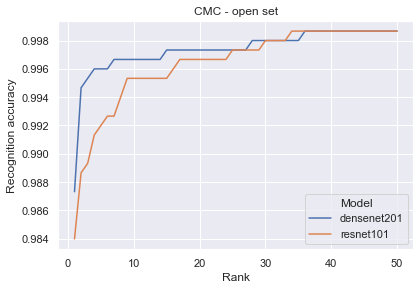

In [24]:
df_os = pd.DataFrame()

df_os["Accuracy"] = np.hstack([
    dn201_res_os["rank_n_accuracies"],
    rn101_res_os["rank_n_accuracies"]
])

df_os["Model"] = np.hstack([
    np.repeat("densenet201", len(dn201_res_os["rank_n_accuracies"])),
    np.repeat("resnet101", len(dn201_res_os["rank_n_accuracies"]))
])

df_os["rank"] = np.hstack([range(1,51) for i in range(2)])

sns.lineplot(data=df_os,x="rank", y="Accuracy", hue="Model")
plt.ylabel("Recognition accuracy")
plt.xlabel("Rank")
plt.tight_layout()
plt.title("CMC - open set")

plt.savefig("open_set_cmc.png")
plt.show()

